# Exercises

## California Housing Dataset

In [7]:
# Import from sklearn the californian housing dataset
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
# Load the dataset
california = fetch_california_housing()
print(california.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Data overview

In [9]:
print (california.data.shape)
print (california.target.shape)


(20640, 8)
(20640,)


In [17]:
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target


In [18]:
print (X.head())
print (y[0:5])

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
[4.526 3.585 3.521 3.413 3.422]


In [22]:
print(X.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

In [23]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None


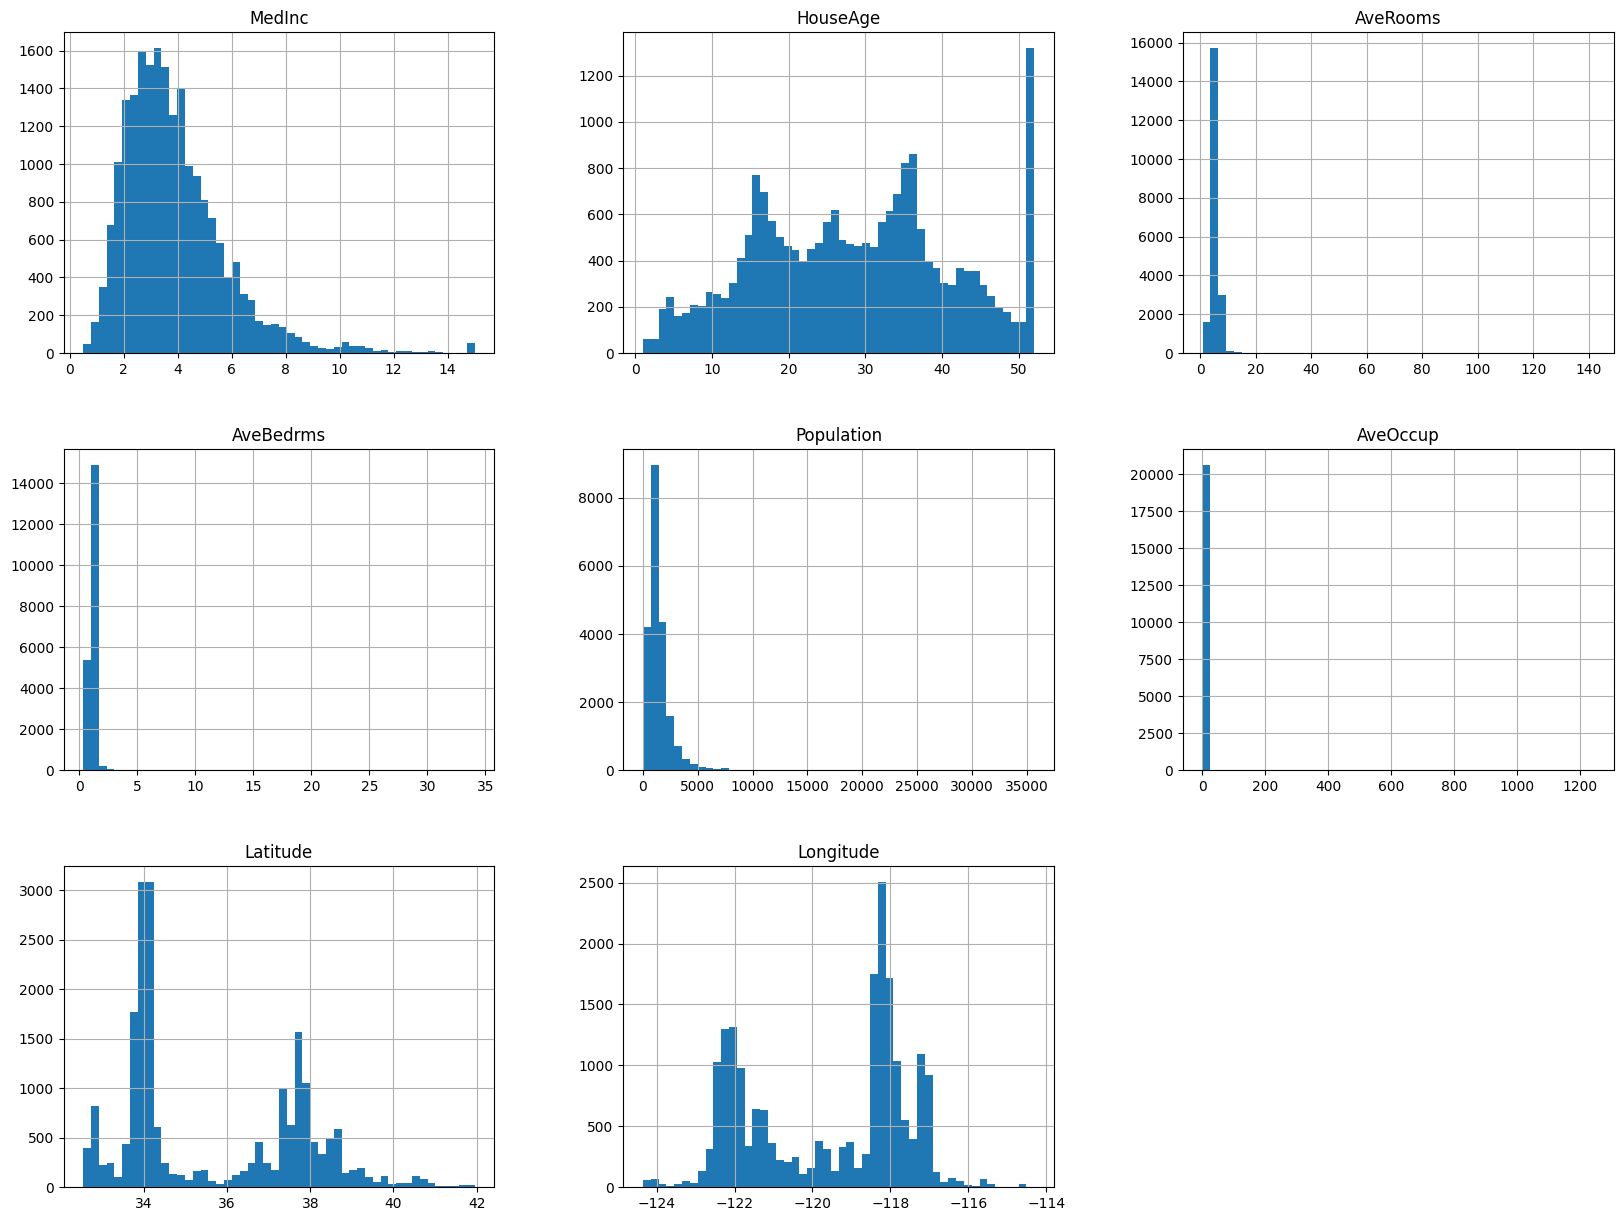

In [24]:
# Histogram matrix
X.hist(bins=50, figsize=(20,15))
plt.show()


In [37]:
# Verifica los valores únicos y el rango de 'AveRooms'
print(X['AveRooms'].describe())
print(X['AveRooms'].unique())
print("\n")
print(X['AveBedrms'].describe())
print("\n")

print(X['AveOccup'].describe())
print("\n")

print(X['Population'].describe())



count    20640.000000
mean         5.429000
std          2.474173
min          0.846154
25%          4.440716
50%          5.229129
75%          6.052381
max        141.909091
Name: AveRooms, dtype: float64
[6.98412698 6.23813708 8.28813559 ... 5.20554273 5.32951289 5.25471698]


count    20640.000000
mean         1.096675
std          0.473911
min          0.333333
25%          1.006079
50%          1.048780
75%          1.099526
max         34.066667
Name: AveBedrms, dtype: float64


count    20640.000000
mean         3.070655
std         10.386050
min          0.692308
25%          2.429741
50%          2.818116
75%          3.282261
max       1243.333333
Name: AveOccup, dtype: float64


count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: Population, dtype: float64


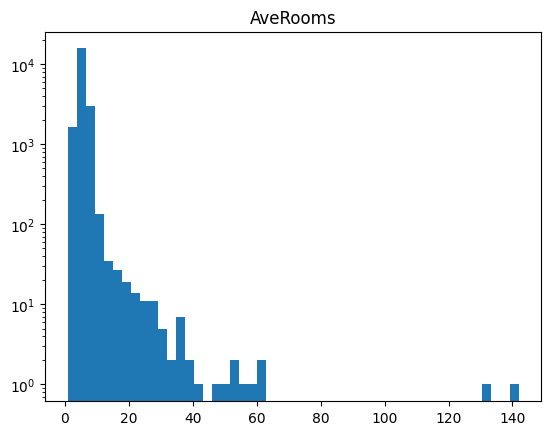

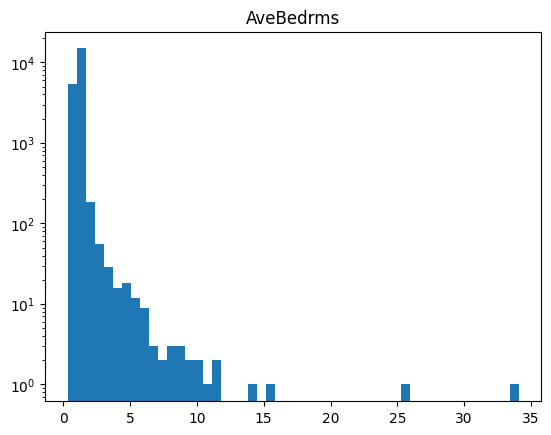

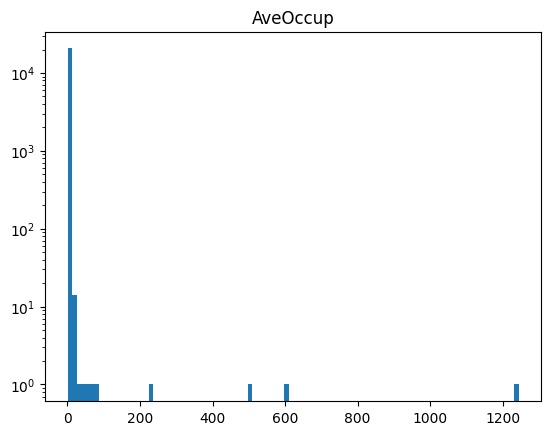

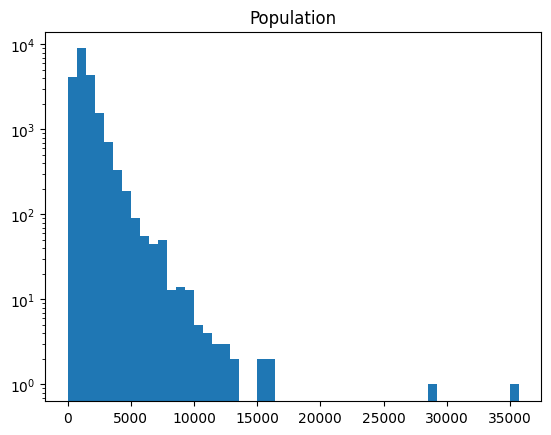

In [41]:
# Log scale to better understand the distribution
plt.hist(X['AveRooms'], bins=50)
plt.yscale('log')
plt.title('AveRooms')
plt.show()

plt.hist(X['AveBedrms'], bins=50)
plt.yscale('log')
plt.title('AveBedrms')
plt.show()

plt.hist(X['AveOccup'], bins=100)
plt.yscale('log')
plt.title('AveOccup')
plt.show()

plt.hist(X['Population'], bins=50)
plt.yscale('log')
plt.title('Population')
plt.show()



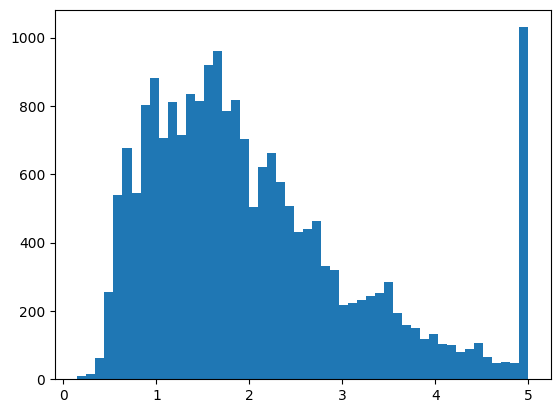

In [42]:
# Plot y histogram
plt.hist(y, bins=50)
plt.show()

## Summary
Some features, such as avg rooms, bedrooms, occup, population are right skewed with few high values. Plotting them with a log scale helps improve the visualization.

There are also some features that are limited on its higher values (house age and the target, the house's value). An adequate method of treating these values should be considered if the client needs a precise model for higher values, particularly for the target. 

# Data splitting
Stratified train/test split according to median income

In [49]:
#Describe median income
print(X['MedInc'].describe())

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: MedInc, dtype: float64


In [52]:
X["income_cat"] = pd.cut(X["MedInc"],
                                  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


In [53]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X, X["income_cat"]):
    strat_train_set = X.loc[train_index]
    strat_test_set = X.loc[test_index]

print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))



income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
